## Changing viscosity configuration

Using the same external forcing as in CNTDIFF/run03, I modified the viscositi configuration in 5 runs (CNTDIFF/ run31-35). Here's a summary of those runs (all with 1 tracer, kv=10^-5 m^2/s)

|run| viscAh | viscAz |ViscSmag| viscAhRemax|viscAhGridMin|Unstable?| Tracer Kv|
|:--:|:-----:|:------:|:------:|:---------:|:------------:|:------:|:----------:|
| 03 | 1e-2  | 1e-2     |   2.2   |  10       |   0.01       |No      | 1E-5|
| 31 | 1e-5  | 1e-5     |   2.2   |  10       |   0.01       |No      | 1E-5|
| 32 | 1e-2  | 1e-2     |   -     |    -       |      -        |No      |1E-5|
| 33 | 1e-5  | 1e-5     |    -    |    -       |      -        |Yes     |1E-5|
| 34 |   -   | -         |   2.2  |    -       |      -        |No      |1E-5|
| 35 |   -   | -         |    -   |  10       |       -       |Yes     |1E-5|
| 36 |   -   | 1e-3      |  2.2   |  -       |       -       | No   |1E-3|
| 37 |   -   | 1e-4      |  2.2   |  -       |       -       | No   |1E-4|


If I specify smag then I don't need Ah. Defaults are 0.

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from math import *

%matplotlib inline

from netCDF4 import Dataset

import seaborn as sns

import canyon_tools.readout_tools as rdout

import canyon_tools.metrics_tools as mpt


In [2]:
# load grid variables
Grid = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc'
GridOut = Dataset(Grid)
GridNoC = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/gridGlob.nc'
GridNoCOut = Dataset(GridNoC)
State03 =  '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/stateGlob.nc'
State31 =  '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run31/stateGlob.nc'
State32 =  '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run32/stateGlob.nc'
State34 =  '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run34/stateGlob.nc'
State36 =  '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run36/stateGlob.nc'
State37 =  '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run37/stateGlob.nc'

StateOut =   Dataset('/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/stateGlob.nc')

nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 

xc = rdout.getField(Grid, 'XC') # x coords tracer cells
yc = rdout.getField(Grid, 'YC') # y coords tracer cells
rc = GridOut.variables['RC']
z = StateOut.variables['Z']
times = StateOut.variables['T']

bathy = rdout.getField(Grid, 'Depth')

hFacC = rdout.getField(Grid, 'HFacC')
MaskC = rdout.getMask(Grid, 'HFacC')

rA = rdout.getField(GridNoC, 'rA') 
drF = GridNoCOut.variables['drF'] # vertical distance between faces
drC = GridNoCOut.variables['drC'] # vertical distance between centers
dxf = GridNoCOut.variables['dxF']

hFacCNoC = rdout.getField(GridNoC, 'HFacC')
mask_NoC = rdout.getMask(GridNoC, 'HFacC')


### Along shore velocity

In [3]:
# get u and v components of velocity
Ustag = rdout.getField(State03,'U')
Vstag = rdout.getField(State03,'V')
UU03, VV03 = rdout.unstagger(Ustag,Vstag)

Ustag = rdout.getField(State31,'U')
Vstag = rdout.getField(State31,'V')
UU31, VV31 = rdout.unstagger(Ustag,Vstag)

Ustag = rdout.getField(State32,'U')
Vstag = rdout.getField(State32,'V')
UU32, VV32 = rdout.unstagger(Ustag,Vstag)

Ustag = rdout.getField(State34,'U')
Vstag = rdout.getField(State34,'V')
UU34, VV34 = rdout.unstagger(Ustag,Vstag)

In [4]:
Ustag = rdout.getField(State36,'U')
Vstag = rdout.getField(State36,'V')
UU36, VV36 = rdout.unstagger(Ustag,Vstag)

Ustag = rdout.getField(State37,'U')
Vstag = rdout.getField(State37,'V')
UU37, VV37 = rdout.unstagger(Ustag,Vstag)

In [5]:
def plotU_timeseries(UU,times,kk,ii):
    '''
    '''
    sns.set_context('talk')
    sns.set_style('white')

    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,6))

    ax1.plot(times[:]/86400.0,UU[:,kk,10,ii], 'r', label = ('CS pos = %1.1f km' %(yc[10,ii]/1000.0)))
    ax1.plot(times[:]/86400.0,UU[:,kk,180,ii], 'b', label = ('CS pos = %1.1f km' %(yc[180,ii]/1000.0)))
    ax1.plot(times[:]/86400.0,UU[:,kk,227,ii], 'purple', label = ('CS pos = %1.1f km' %(yc[227,ii]/1000.0)))
    ax1.plot(times[:]/86400.0,UU[:,kk,267,ii], 'orange', label = ('CS pos = %1.1f km' %(yc[267,ii]/1000.0)))
    ax1.plot(times[:]/86400.0,UU[:,kk,350,ii], 'g', label = ('CS pos = %1.1f km' %(yc[350,ii]/1000.0)))

    ax1.legend(loc = 0)
    ax1.set_ylabel('Alongshore velocity (m/s)')
    ax1.set_xlabel('time (days)')
    ax1.set_title('at z = %1.1f m' %z[kk])

    cntr = ax2.contour(xc/1000.0,yc/1000.0,bathy,[20,50,100,150,300,450,600,750,900,1050], colors = '0.4')
    ax2.clabel(cntr)
    ax2.plot(xc[10,ii]/1000.0,yc[10,ii]/1000.0,'ro',markersize = 14)
    ax2.plot(xc[180,ii]/1000.0,yc[180,ii]/1000.0,'bo',markersize = 14)
    ax2.plot(xc[227,ii]/1000.0,yc[227,ii]/1000.0,'o',color = 'purple',markersize = 14)
    ax2.plot(xc[267,ii]/1000.0,yc[267,ii]/1000.0,'o',color='orange',markersize = 14)
    ax2.plot(xc[350,ii]/1000.0,yc[350,ii]/1000.0,'go',markersize = 14)
    ax2.set_xlabel('(km)')
    ax2.set_ylabel('(km)')

/home/kramosmu/anaconda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/home/kramosmu/anaconda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


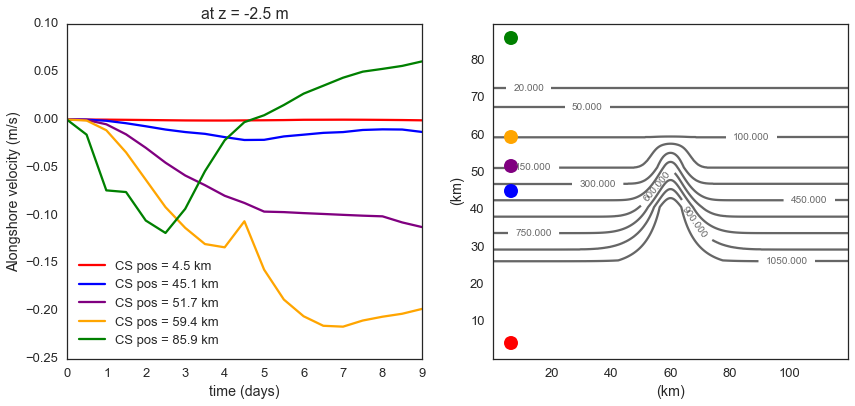

In [6]:
plotU_timeseries(UU03-UU31,times,0,10)


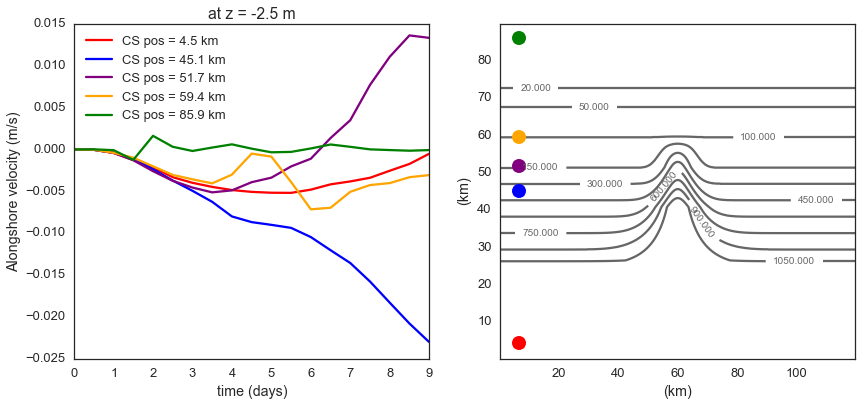

In [7]:
plotU_timeseries(UU03-UU32,times,0,10)


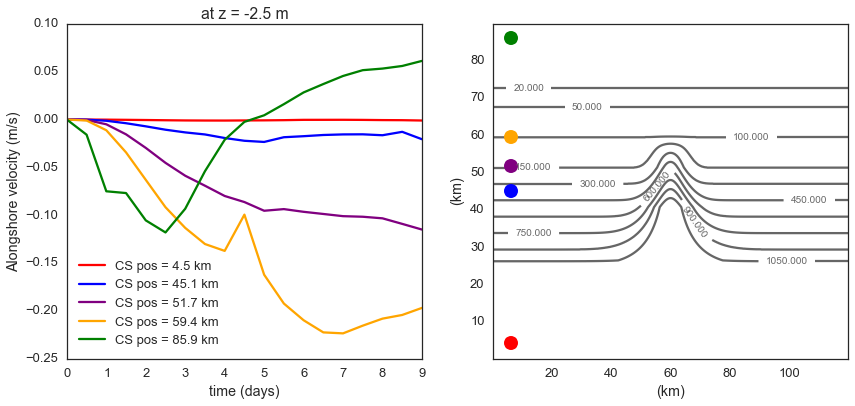

In [8]:
plotU_timeseries(UU03-UU34,times,0,10)


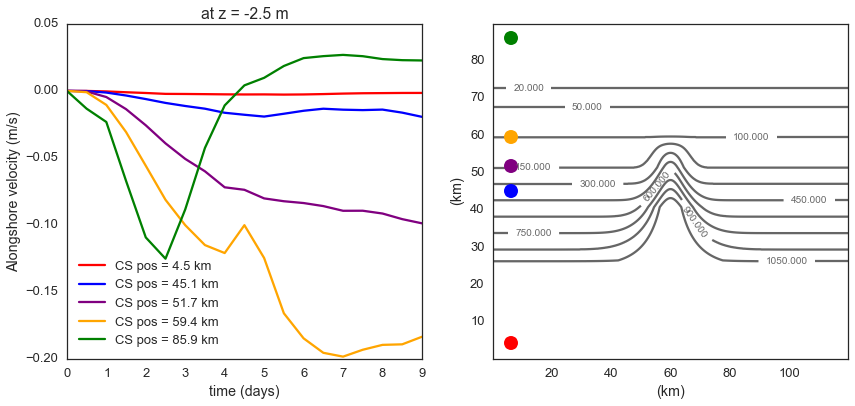

In [9]:
plotU_timeseries(UU03-UU36,times,0,10)

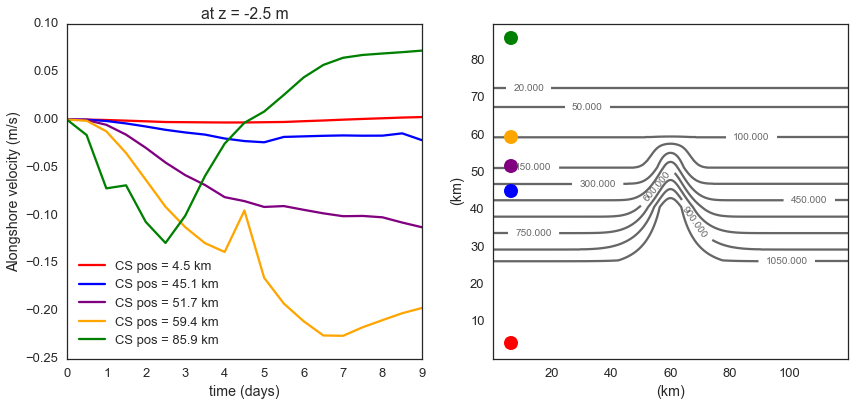

In [10]:
plotU_timeseries(UU03-UU37,times,0,10)

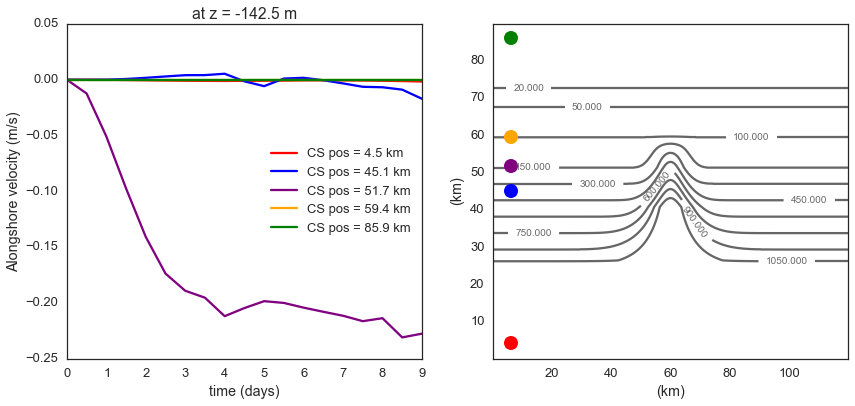

In [11]:
plotU_timeseries(UU03-UU31,times,28,10)

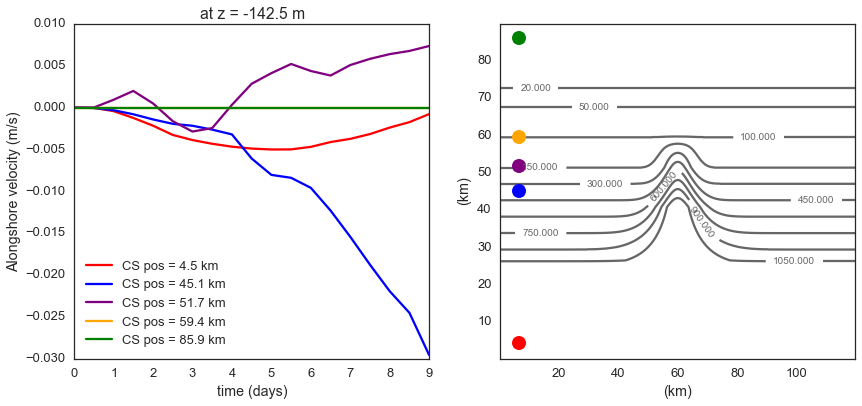

In [12]:
plotU_timeseries(UU03-UU32,times,28,10)

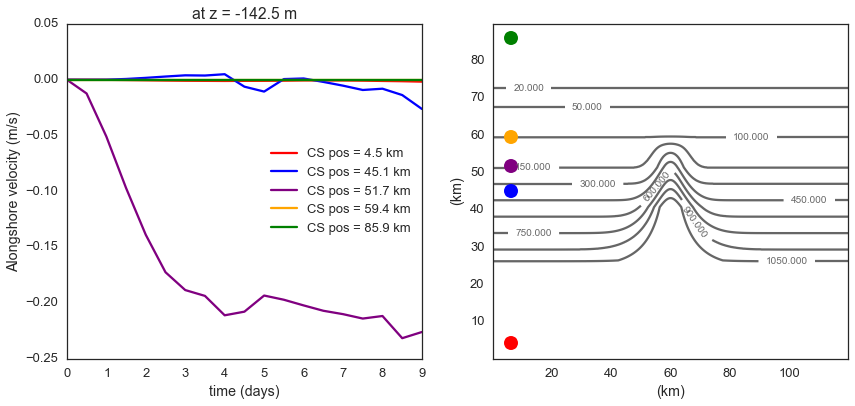

In [13]:
plotU_timeseries(UU03-UU34,times,28,10)

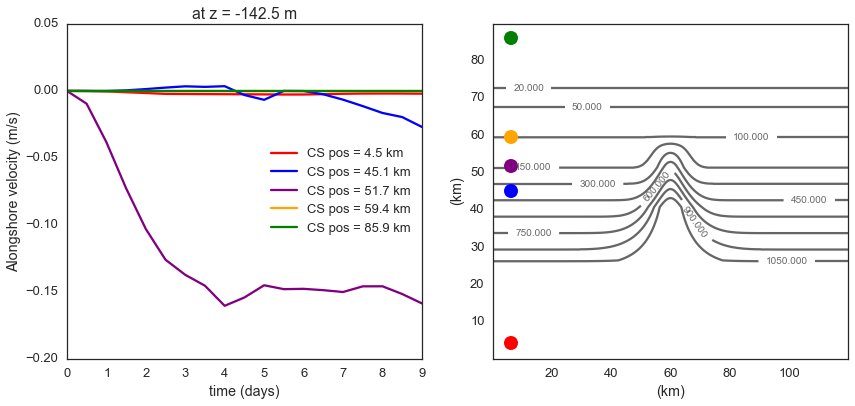

In [14]:
plotU_timeseries(UU03-UU36,times,28,10)

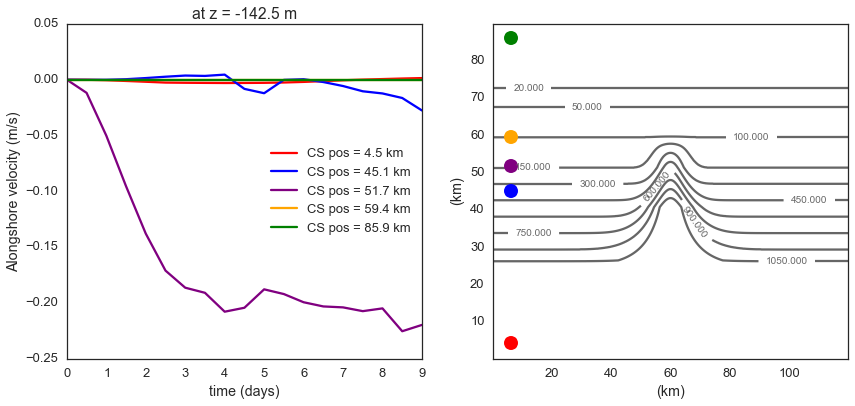

In [15]:
plotU_timeseries(UU03-UU37,times,28,10)

## SSH anomaly



In [16]:
# Load ssh field
Eta03 = rdout.getField(State03,'Eta')
Eta31 = rdout.getField(State31,'Eta')
Eta32 = rdout.getField(State32,'Eta')
Eta34 = rdout.getField(State34,'Eta')
Eta36 = rdout.getField(State36,'Eta')
Eta37 = rdout.getField(State37,'Eta')

In [17]:
def contourfEta(Eta,tt1,tt2,tt3,tt4,tt5,tt6,tt7,tt8,tt9):
    '''
    '''
    sns.set_context('talk')
    sns.set_style('white')

    fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3,figsize=(15,10), sharex=True, sharey=True)

    cf = ax1.contourf(xc/1000.0,yc/1000.0,Eta[tt1,:,:], 20, cmap = 'PiYG', vmax = 0.1, vmin= -0.1)
    cntr = ax1.contour(xc/1000.0,yc/1000.0,bathy,[20,50,100,150,300,450,600,800,1000], colors = '0.4')
    ax1.clabel(cntr)
    
    cf = ax2.contourf(xc/1000.0,yc/1000.0,Eta[tt2,:,:], 20,cmap = 'PiYG', vmax = 0.1, vmin= -0.1)
    cntr = ax2.contour(xc/1000.0,yc/1000.0,bathy,[20,50,100,150,300,450,600,800,1000], colors = '0.4')
    ax2.clabel(cntr)
    
    cf = ax3.contourf(xc/1000.0,yc/1000.0,Eta[tt3,:,:],20, cmap = 'PiYG', vmax = 0.1, vmin= -0.1)
    cntr = ax3.contour(xc/1000.0,yc/1000.0,bathy,[20,50,100,150,300,450,600,800,1000], colors = '0.4')
    ax3.clabel(cntr)
    
    cf = ax4.contourf(xc/1000.0,yc/1000.0,Eta[tt4,:,:], 20,cmap = 'PiYG', vmax = 0.1, vmin= -0.1)
    cntr = ax4.contour(xc/1000.0,yc/1000.0,bathy,[20,50,100,150,300,450,600,800,1000], colors = '0.4')
    ax4.clabel(cntr)
    
    cf = ax5.contourf(xc/1000.0,yc/1000.0,Eta[tt5,:,:],20, cmap = 'PiYG', vmax = 0.1, vmin= -0.1)
    cntr = ax5.contour(xc/1000.0,yc/1000.0,bathy,[20,50,100,150,300,450,600,800,1000], colors = '0.4')
    ax5.clabel(cntr)
    
    cf = ax6.contourf(xc/1000.0,yc/1000.0,Eta[tt6,:,:], 20,cmap = 'PiYG', vmax = 0.1, vmin= -0.1)
    cntr = ax6.contour(xc/1000.0,yc/1000.0,bathy,[20,50,100,150,300,450,600,800,1000], colors = '0.4')
    ax6.clabel(cntr)
    
    cf = ax7.contourf(xc/1000.0,yc/1000.0,Eta[tt7,:,:],20, cmap = 'PiYG', vmax = 0.1, vmin= -0.1)
    cntr = ax7.contour(xc/1000.0,yc/1000.0,bathy,[20,50,100,150,300,450,600,800,1000], colors = '0.4')
    ax7.clabel(cntr)
    
    cf = ax8.contourf(xc/1000.0,yc/1000.0,Eta[tt8,:,:], 20,cmap = 'PiYG', vmax = 0.1, vmin= -0.1)
    cntr = ax8.contour(xc/1000.0,yc/1000.0,bathy,[20,50,100,150,300,450,600,800,1000], colors = '0.4')
    ax8.clabel(cntr)
    
    cf9 = ax9.contourf(xc/1000.0,yc/1000.0,Eta[tt9,:,:],20, cmap = 'PiYG', vmax = 0.1, vmin= -0.1)
    cntr = ax9.contour(xc/1000.0,yc/1000.0,bathy,[20,50,100,150,300,450,600,800,1000], colors = '0.4')
    ax9.clabel(cntr)
    
    ax1.annotate('Day 1', xy=(1, 1), xytext=(100, 5), fontsize = 14)
    ax9.annotate('Day 9', xy=(1, 1), xytext=(100, 5), fontsize = 14)
    
    cbar_ax = fig.add_axes([0.12, -0.02, 0.8, 0.03])
    fig.colorbar(cf9, cax=cbar_ax, orientation='horizontal')
    cbar_ax.set_xlabel('$\eta$ (m)')
    
    ax4.set_ylabel('(km)')
    ax8.set_xlabel('(km)')
    plt.tight_layout()
    

In [18]:
def plotEta(EtaSlice, times, title):
    '''
    '''
    sns.set_context('talk')
    sns.set_style('dark')
    sns.set_palette(sns.dark_palette("green",10))
    
    fig,(ax1) = plt.subplots(1,1,figsize=(8,8), sharex=True, sharey=True)
    
    for tt in times:
        ax1.plot(yc[:,1],EtaSlice[tt,:],label = 'day %1.1f' %(tt/2))
    
    ax1.set_ylabel('$\eta$ (m)')
    ax1.set_xlabel('Cross-shore distance (km)')
    ax1.set_title(title)
    ax1.legend(loc=0)
    plt.tight_layout()
    

In [19]:
#plotEta(Eta[:,:,120], [0,2,4,6,8,10,12,14,16,18], 'SSH at x=%1.1f km' %xc[1,120])

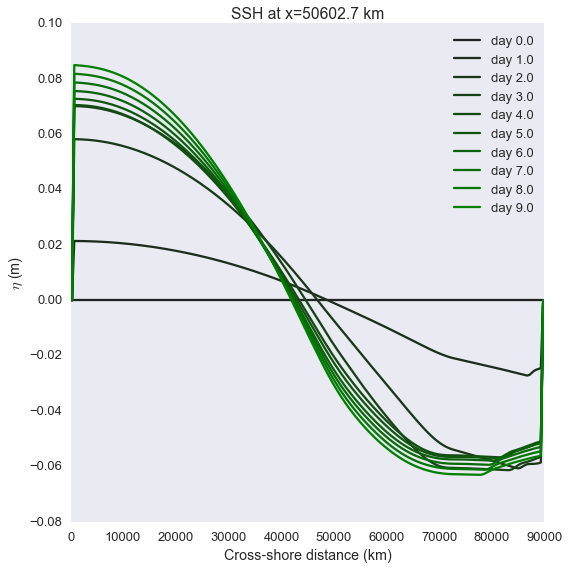

In [20]:
plotEta(Eta03[:,:,120], [0,2,4,6,8,10,12,14,16,18], 'SSH at x=%1.1f km' %xc[1,120])

SSH keeps getting deeper at the coast and higher at the open ocean as the simulation evolves. What is that zero at the boundaries?

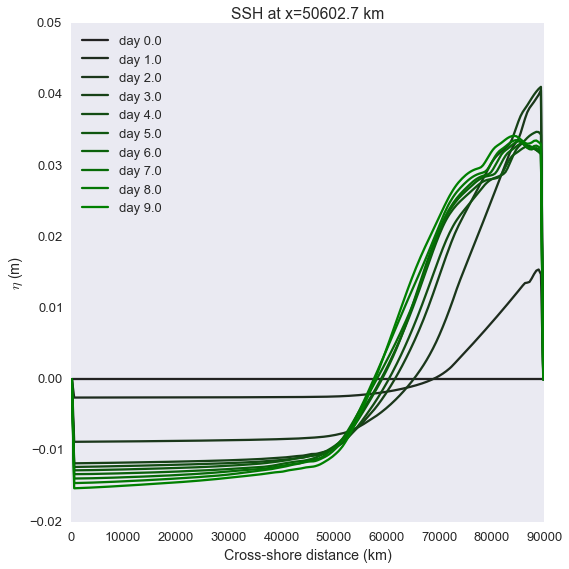

In [21]:
plotEta(Eta03[:,:,120]-Eta31[:,:,120], [0,2,4,6,8,10,12,14,16,18], 'SSH at x=%1.1f km' %xc[1,120])

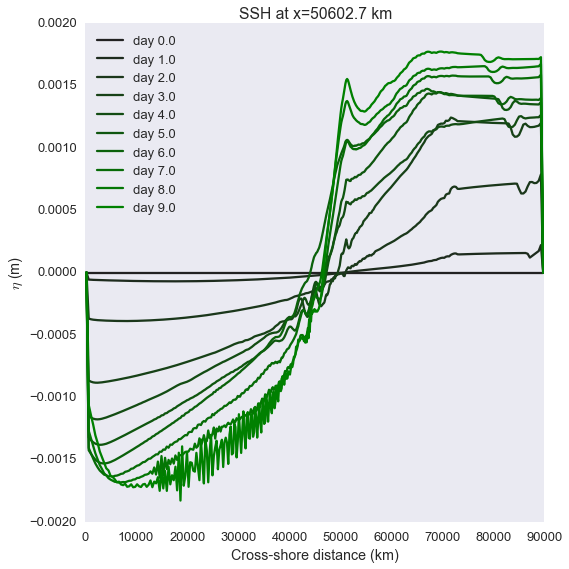

In [22]:
plotEta(Eta03[:,:,120]-Eta32[:,:,120], [0,2,4,6,8,10,12,14,16,18], 'SSH at x=%1.1f km' %xc[1,120])

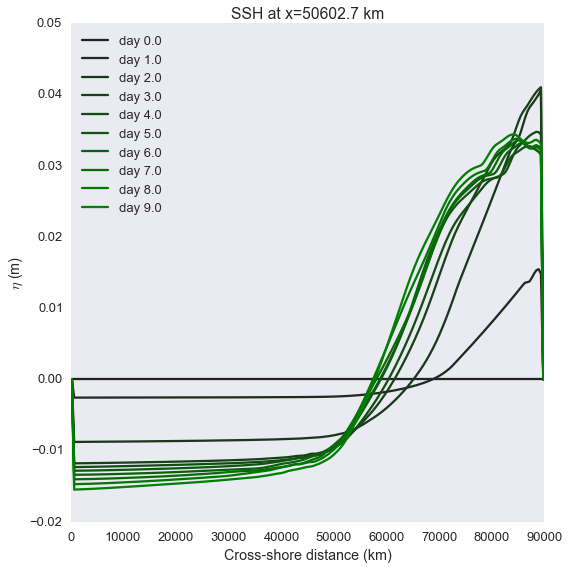

In [23]:
plotEta(Eta03[:,:,120]-Eta34[:,:,120], [0,2,4,6,8,10,12,14,16,18], 'SSH at x=%1.1f km' %xc[1,120])

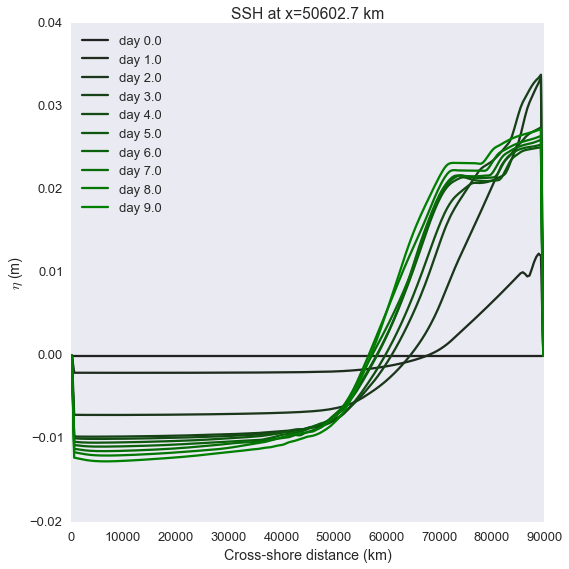

In [24]:
plotEta(Eta03[:,:,120]-Eta36[:,:,120], [0,2,4,6,8,10,12,14,16,18], 'SSH at x=%1.1f km' %xc[1,120])

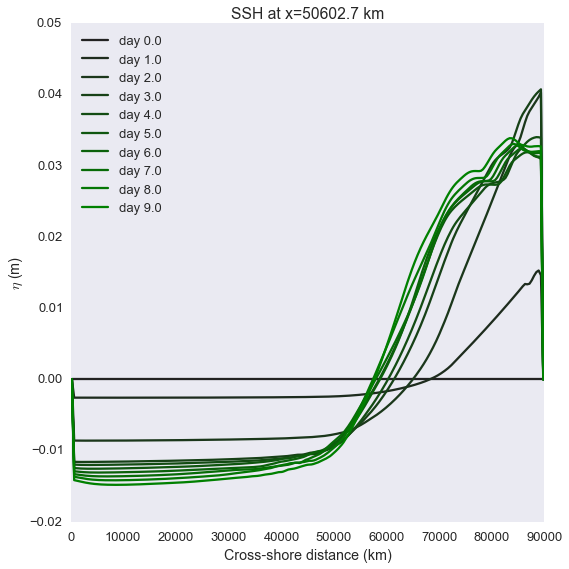

In [25]:
plotEta(Eta03[:,:,120]-Eta37[:,:,120], [0,2,4,6,8,10,12,14,16,18], 'SSH at x=%1.1f km' %xc[1,120])

## Quick comparison of temperatures

In [26]:
Temp03 = rdout.getField(State03,'Temp')
Temp31 = rdout.getField(State31,'Temp')
Temp32 = rdout.getField(State32,'Temp')

In [27]:
Temp34 = rdout.getField(State34,'Temp')
Temp36 = rdout.getField(State36,'Temp')
Temp37 = rdout.getField(State37,'Temp')

In [28]:
MaskExp = np.expand_dims(MaskC,0)
MaskT = MaskExp + np.zeros(Temp03.shape)

Temp_masked03 = np.ma.masked_array(Temp03,mask = MaskT) 
Temp_masked31 = np.ma.masked_array(Temp31,mask = MaskT) 
Temp_masked32 = np.ma.masked_array(Temp32,mask = MaskT) 
Temp_masked34 = np.ma.masked_array(Temp34,mask = MaskT) 
Temp_masked36 = np.ma.masked_array(Temp36,mask = MaskT) 
Temp_masked37 = np.ma.masked_array(Temp37,mask = MaskT) 


In [29]:
def contourfTemp(Temp,tt1=2,tt2=4,tt3=6,tt4=8,tt5=10,tt6=12,tt7=14,tt8=16,tt9=18,tmax=17,tmin=0,colormap='rainbow'):
    '''
    '''
    sns.set_context('talk')
    sns.set_style('white')

    fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3,figsize=(15,10), sharex=True, sharey=True)

    cf = ax1.contourf(xc/1000.0,yc/1000.0,Temp[tt1,:,:], 20, cmap = colormap, vmax = tmax, vmin=tmin)
    cntr = ax1.contour(xc/1000.0,yc/1000.0,bathy,[20,50,100,150,300,450,600,800,1000], colors = '0.4')
    ax1.clabel(cntr)
    
    cf = ax2.contourf(xc/1000.0,yc/1000.0,Temp[tt2,:,:], 20,cmap = colormap, vmax = tmax, vmin=tmin)
    cntr = ax2.contour(xc/1000.0,yc/1000.0,bathy,[20,50,100,150,300,450,600,800,1000], colors = '0.4')
    ax2.clabel(cntr)
    
    cf = ax3.contourf(xc/1000.0,yc/1000.0,Temp[tt3,:,:],20, cmap = colormap, vmax = tmax, vmin=tmin)
    cntr = ax3.contour(xc/1000.0,yc/1000.0,bathy,[20,50,100,150,300,450,600,800,1000], colors = '0.4')
    ax3.clabel(cntr)
    
    cf = ax4.contourf(xc/1000.0,yc/1000.0,Temp[tt4,:,:], 20,cmap = colormap, vmax = tmax, vmin=tmin)
    cntr = ax4.contour(xc/1000.0,yc/1000.0,bathy,[20,50,100,150,300,450,600,800,1000], colors = '0.4')
    ax4.clabel(cntr)
    
    cf = ax5.contourf(xc/1000.0,yc/1000.0,Temp[tt5,:,:],20, cmap = colormap, vmax = tmax, vmin=tmin)
    cntr = ax5.contour(xc/1000.0,yc/1000.0,bathy,[20,50,100,150,300,450,600,800,1000], colors = '0.4')
    ax5.clabel(cntr)
    
    cf = ax6.contourf(xc/1000.0,yc/1000.0,Temp[tt6,:,:], 20,cmap = colormap, vmax = tmax, vmin=tmin)
    cntr = ax6.contour(xc/1000.0,yc/1000.0,bathy,[20,50,100,150,300,450,600,800,1000], colors = '0.4')
    ax6.clabel(cntr)
    
    cf = ax7.contourf(xc/1000.0,yc/1000.0,Temp[tt7,:,:],20, cmap = colormap, vmax = tmax, vmin=tmin)
    cntr = ax7.contour(xc/1000.0,yc/1000.0,bathy,[20,50,100,150,300,450,600,800,1000], colors = '0.4')
    ax7.clabel(cntr)
    
    cf = ax8.contourf(xc/1000.0,yc/1000.0,Temp[tt8,:,:], 20,cmap = colormap, vmax = tmax, vmin=tmin)
    cntr = ax8.contour(xc/1000.0,yc/1000.0,bathy,[20,50,100,150,300,450,600,800,1000], colors = '0.4')
    ax8.clabel(cntr)
    
    cf9 = ax9.contourf(xc/1000.0,yc/1000.0,Temp[tt9,:,:],20, cmap = colormap, vmax = tmax, vmin=tmin)
    cntr = ax9.contour(xc/1000.0,yc/1000.0,bathy,[20,50,100,150,300,450,600,800,1000], colors = '0.4')
    ax9.clabel(cntr)
    
    ax1.annotate('Day 1', xy=(1, 1), xytext=(100, 5), fontsize = 14)
    ax9.annotate('Day 9', xy=(1, 1), xytext=(100, 5), fontsize = 14)
    
    cbar_ax = fig.add_axes([0.12, -0.02, 0.8, 0.03])
    fig.colorbar(cf9, cax=cbar_ax, orientation='horizontal')
    cbar_ax.set_xlabel('Temperature ($^{\circ}C$)')
    
    ax4.set_ylabel('(km)')
    ax8.set_xlabel('(km)')
    plt.tight_layout()

## Surface

/home/kramosmu/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


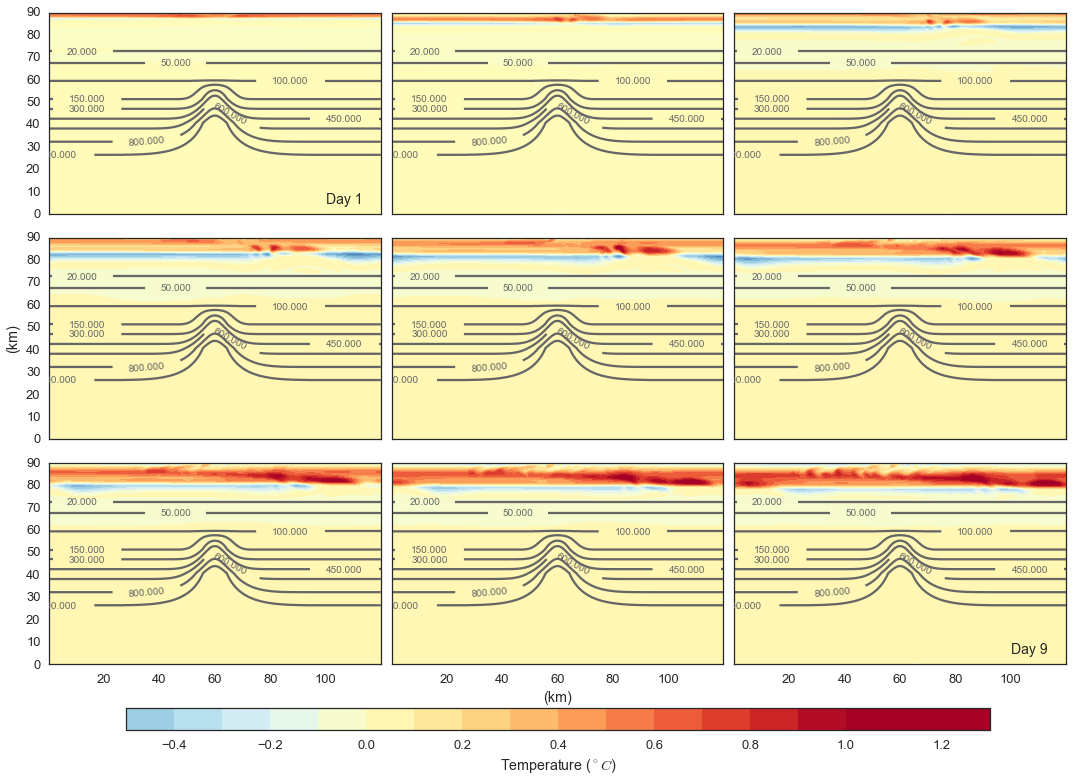

In [30]:
contourfTemp(Temp_masked03[:,0,:,:]-Temp_masked31[:,0,:,:],tmax=1.0,tmin=-1.0,colormap='RdYlBu_r')

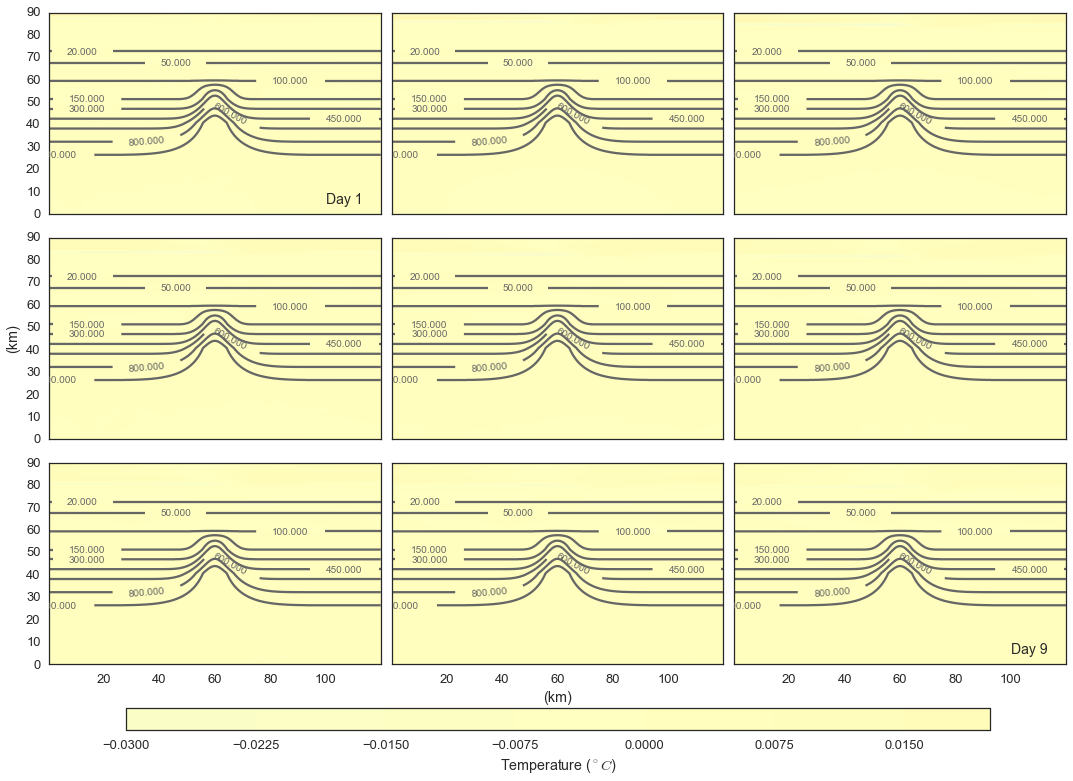

In [40]:
contourfTemp(Temp_masked03[:,0,:,:]-Temp_masked32[:,0,:,:],tmax=1.0,tmin=-1.0,colormap='RdYlBu_r')

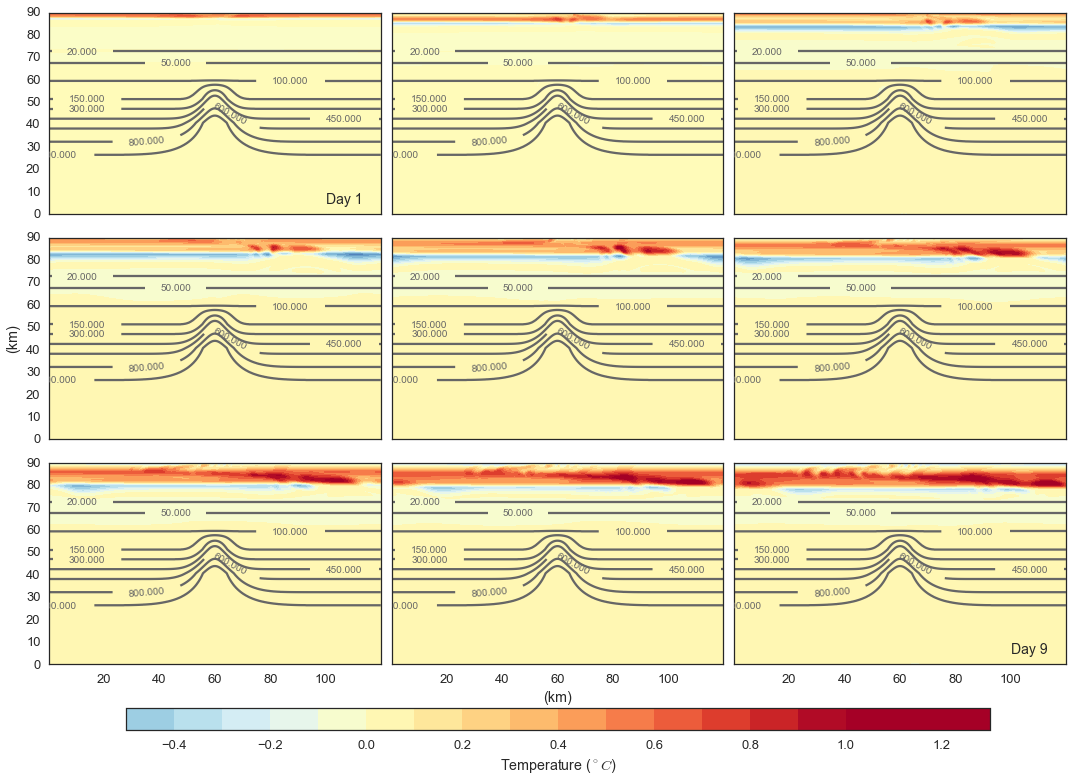

In [41]:
contourfTemp(Temp_masked03[:,0,:,:]-Temp_masked34[:,0,:,:],tmax=1.0,tmin=-1.0,colormap='RdYlBu_r')

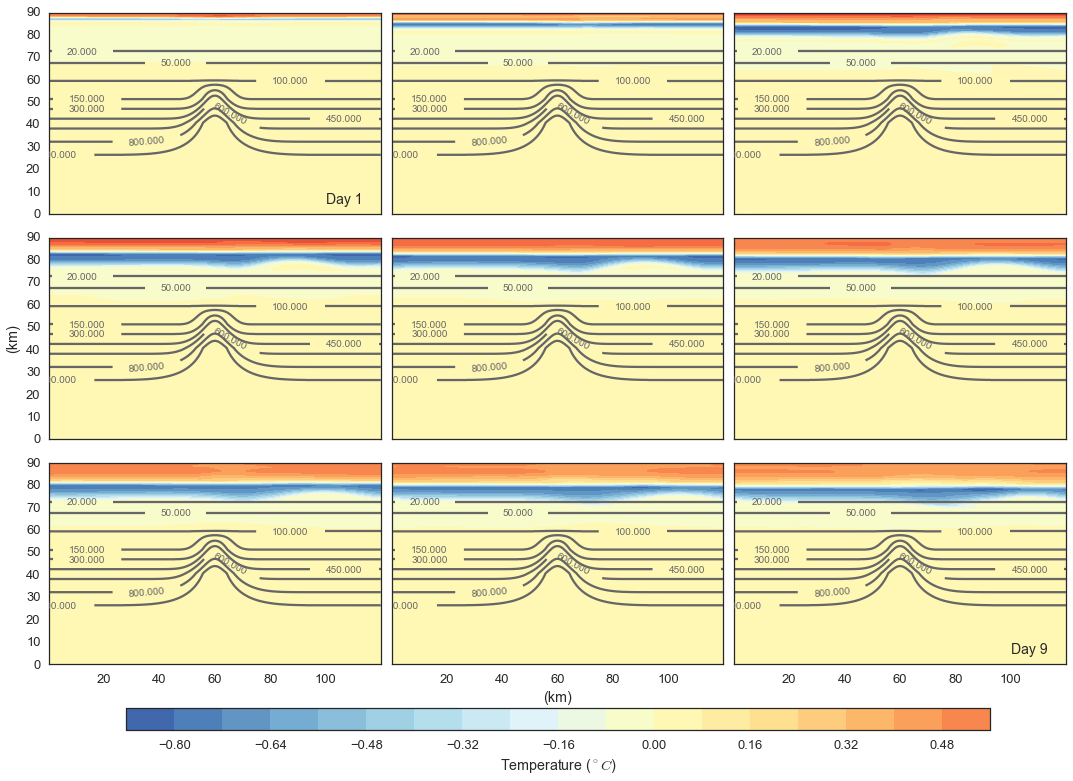

In [31]:
contourfTemp(Temp_masked03[:,0,:,:]-Temp_masked36[:,0,:,:],tmax=1.0,tmin=-1.0,colormap='RdYlBu_r')

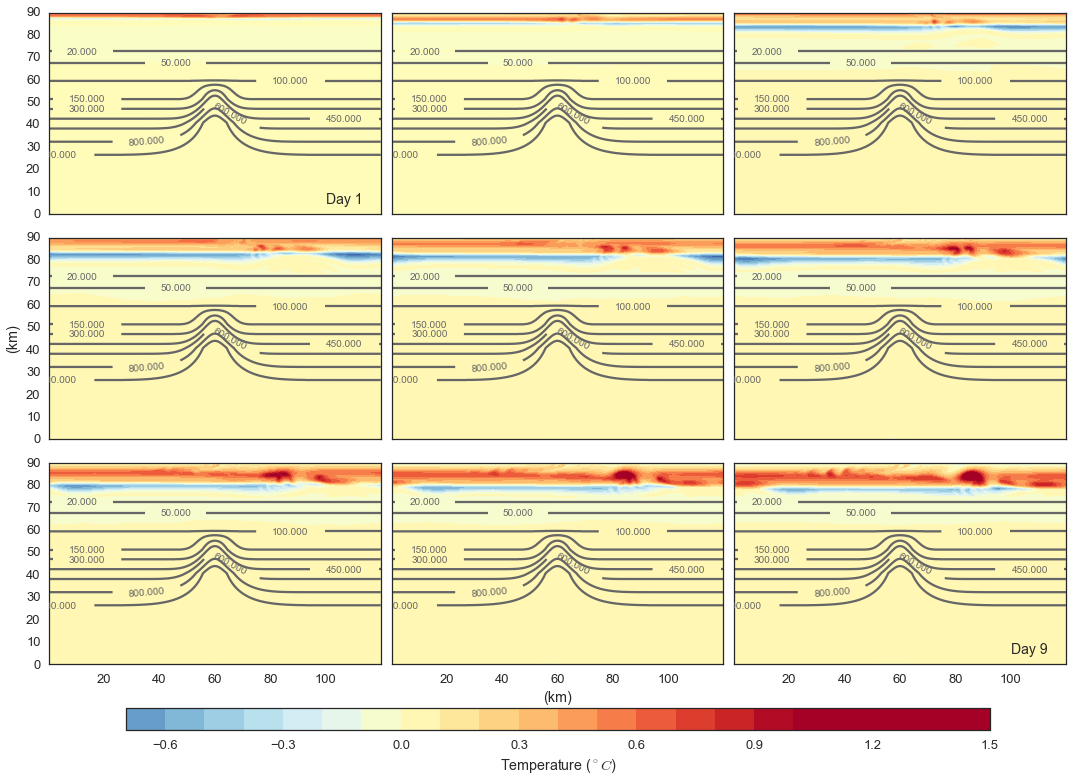

In [32]:
contourfTemp(Temp_masked03[:,0,:,:]-Temp_masked37[:,0,:,:],tmax=1.0,tmin=-1.0,colormap='RdYlBu_r')

## Shelf break depth

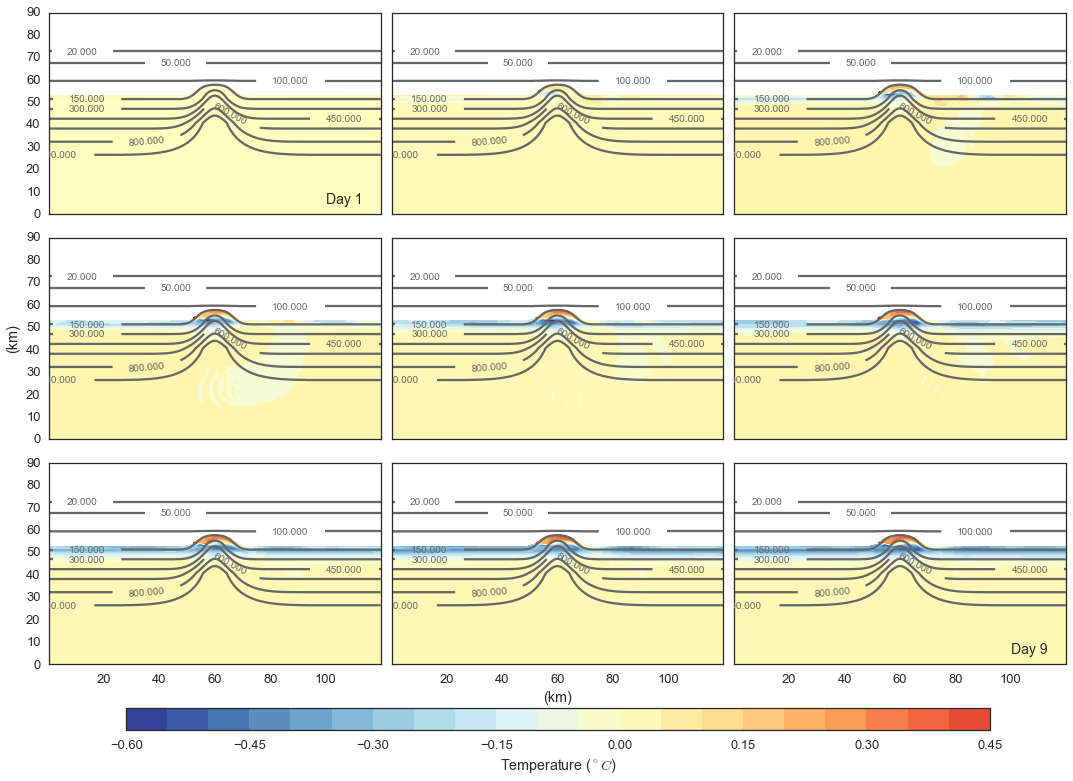

In [33]:
contourfTemp(Temp_masked03[:,28,:,:]-Temp_masked31[:,28,:,:],tmax=0.6,tmin=-0.6,colormap='RdYlBu_r')

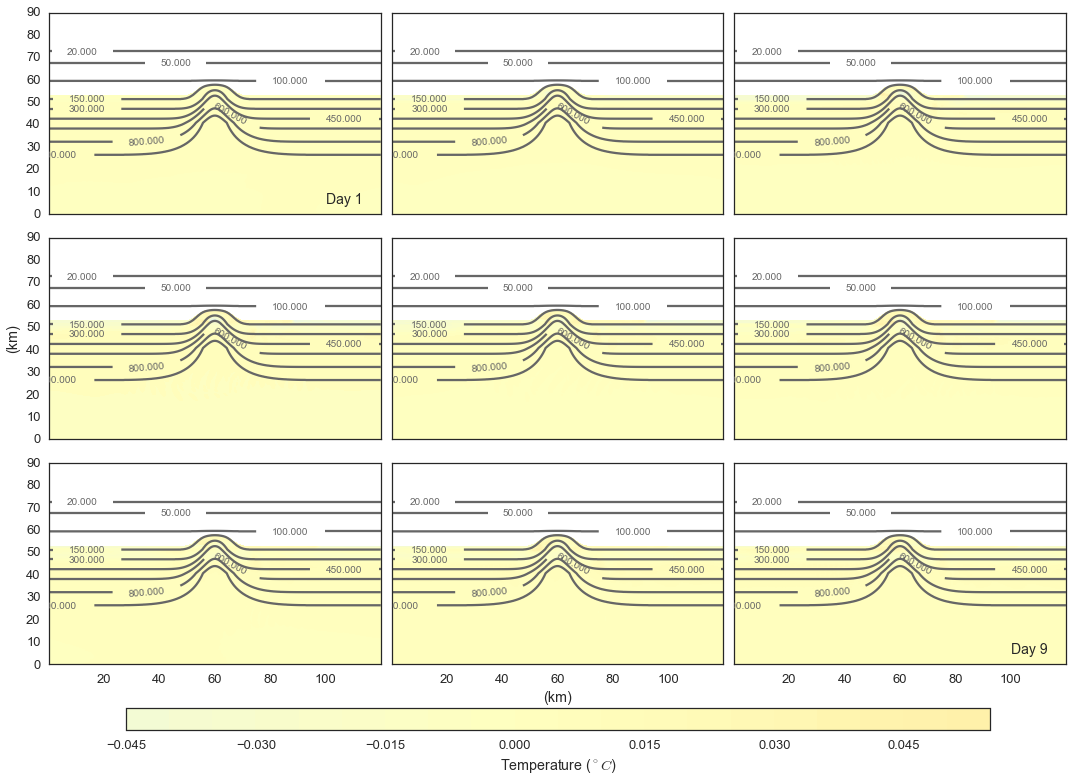

In [46]:
contourfTemp(Temp_masked03[:,28,:,:]-Temp_masked32[:,28,:,:],tmax=0.6,tmin=-0.6,colormap='RdYlBu_r')

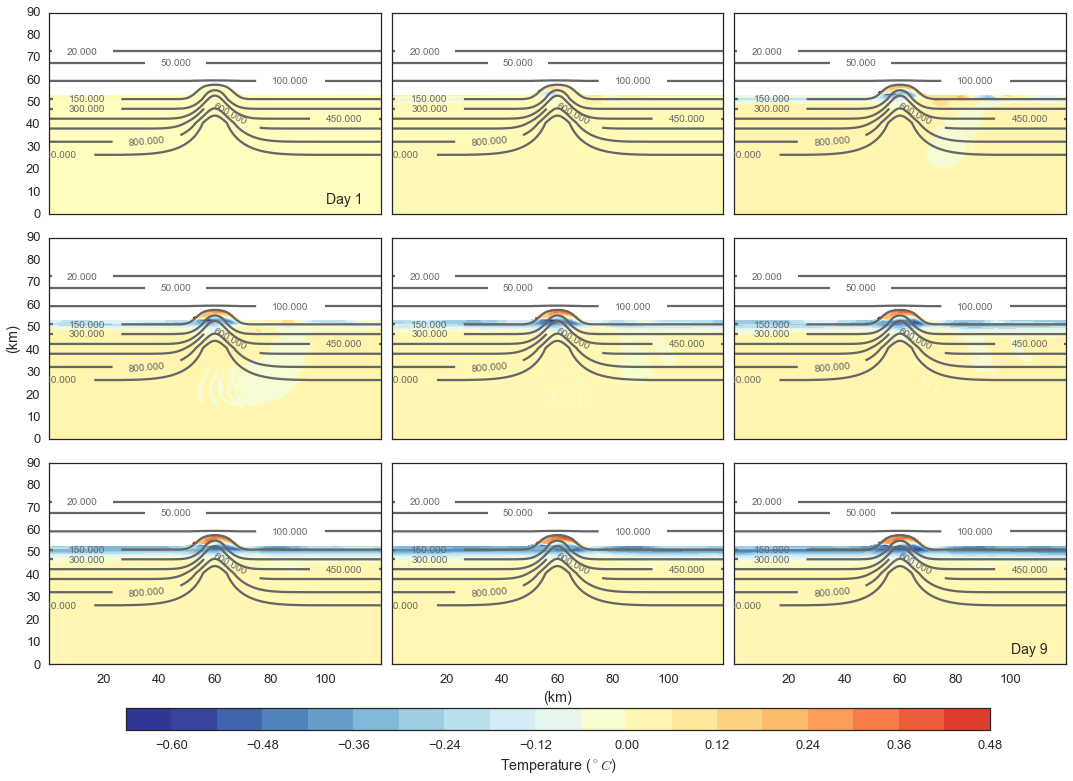

In [47]:
contourfTemp(Temp_masked03[:,28,:,:]-Temp_masked34[:,28,:,:],tmax=0.6,tmin=-0.6,colormap='RdYlBu_r')

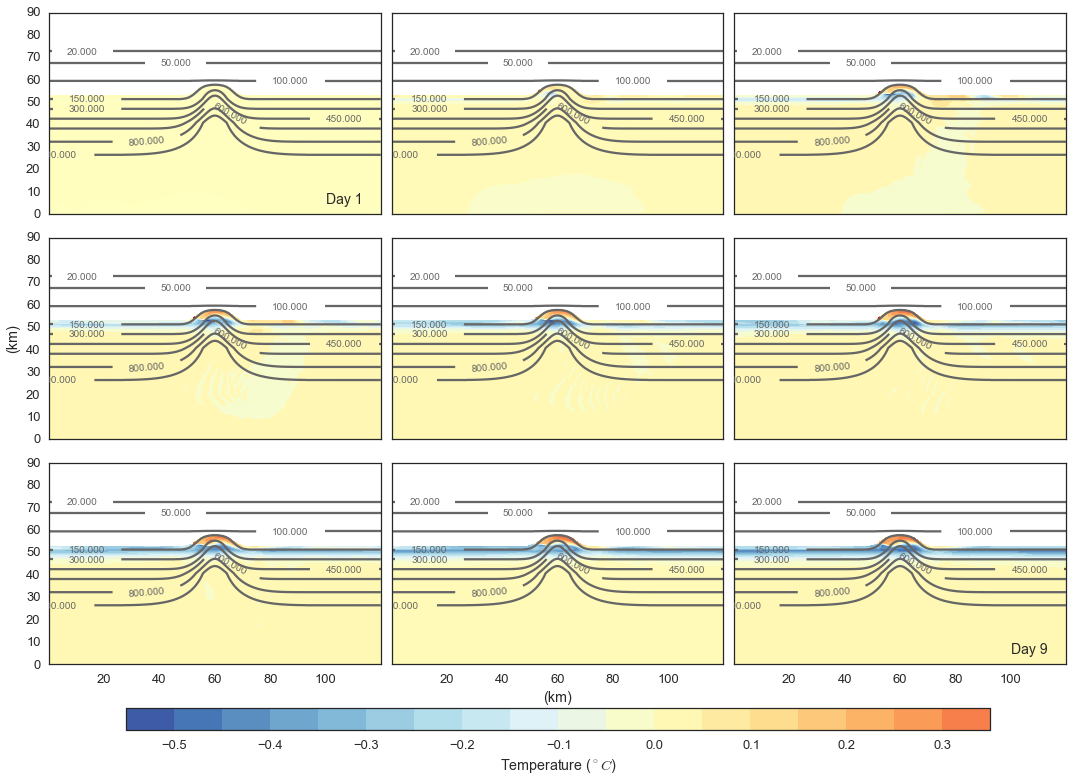

In [34]:
contourfTemp(Temp_masked03[:,28,:,:]-Temp_masked36[:,28,:,:],tmax=0.6,tmin=-0.6,colormap='RdYlBu_r')

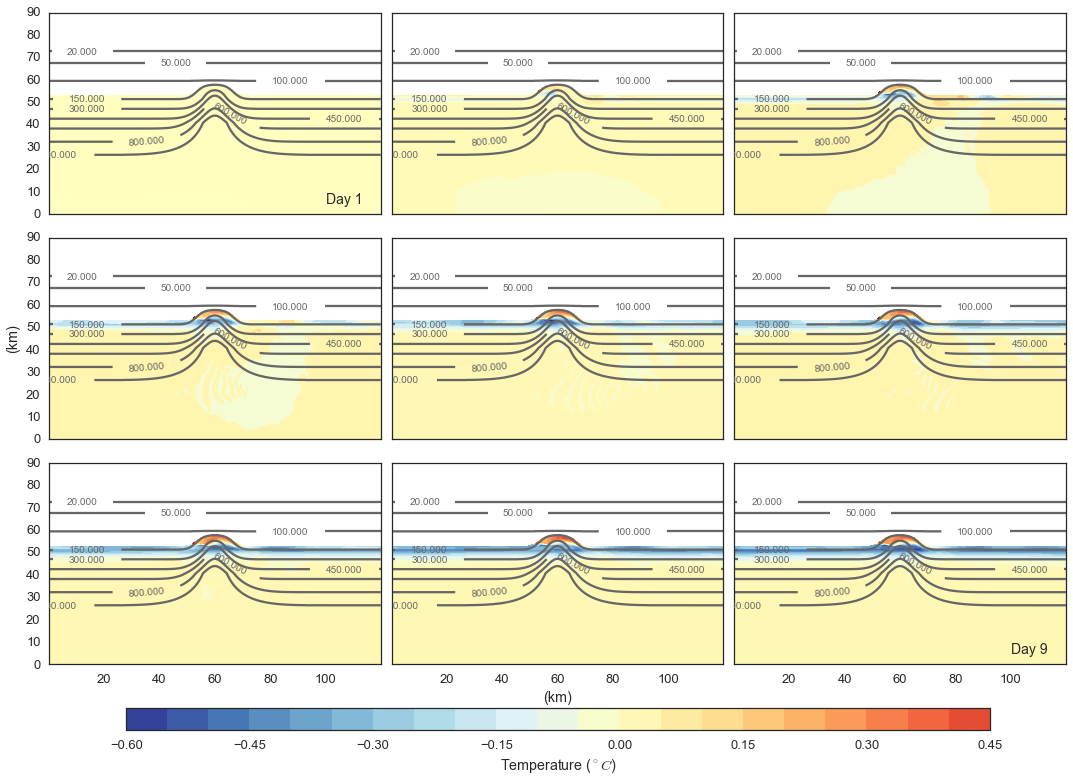

In [35]:
contourfTemp(Temp_masked03[:,28,:,:]-Temp_masked37[:,28,:,:],tmax=0.6,tmin=-0.6,colormap='RdYlBu_r')

## Upwelling differences - vertically integrated tracer along shelf

In [36]:
def HCW_Tracer_AlongShelf(Tr,MaskC,nzlim,rA,hFacC,drF,yin,zfin,xi,yi):
  '''
  INPUT----------------------------------------------------------------------------------------------------------------
    Tr    : Array with concentration values for a tracer. Until this function is more general, this should be size 19x90x360x360
    MaskC : Land mask for tracer
    nzlim : The nz index under which to look for water properties
    rA    : Area of cell faces at C points (360x360)
    fFacC : Fraction of open cell (90x360x360)
    drF   : Distance between cell faces (90)
    yin   : across-shore index of shelf break
    zfin  : shelf break index + 1 
    xi    : initial profile x index
    yi    : initial profile y index
    
    OUTPUT----------------------------------------------------------------------------------------------------------------
    VolWaterHighConc =  Array with the volume of water over the shelf [t,360] at every time output.
    Total_Tracer =  Array with the mass of tracer (m^3*[C]*l/m^3) at each x-position over the shelf [t,360] at 
                    every time output. 
                                                
  -----------------------------------------------------------------------------------------------------------------------
  '''
  maskExp = mpt.maskExpand(MaskC,Tr)

  TrMask=np.ma.array(Tr,mask=maskExp)   
    
  trlim = TrMask[0,nzlim,yi,xi]
    
  print('tracer limit concentration is: ',trlim)
    
    
  # mask cells with tracer concentration < trlim on shelf
  HighConc_Masked = np.ma.masked_less(TrMask[:,:zfin,yin:,:], trlim) 
  HighConc_Mask = HighConc_Masked.mask
    
  #Get volume of water of cells with relatively high concentration
  rA_exp = np.expand_dims(rA[yin:,:],0)
  drF_exp = np.expand_dims(np.expand_dims(drF[:zfin],1),1)
  rA_exp = rA_exp + np.zeros(hFacC[:zfin,yin:,:].shape)
  drF_exp = drF_exp + np.zeros(hFacC[:zfin,yin:,:].shape)
    
  ShelfVolume = hFacC[:zfin,yin:,:]*drF_exp*rA_exp
  ShelfVolume_exp = np.expand_dims(ShelfVolume,0)
  ShelfVolume_exp = ShelfVolume_exp + np.zeros(HighConc_Mask.shape)
    
  HighConc_CellVol = np.ma.masked_array(ShelfVolume_exp,mask = HighConc_Mask) 
  VolWaterHighConc =np.ma.sum(np.ma.sum(HighConc_CellVol,axis = 1),axis=1)
    
   #Get total mass of tracer on shelf
  Total_Tracer = np.ma.sum(np.ma.sum(ShelfVolume_exp*TrMask[:,:zfin,yin:,:]*1000.0,axis = 1),axis=1)
   # 1 m^3 = 1000 l
    
  return (VolWaterHighConc, Total_Tracer)

In [37]:
Ptracers = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/ptracersGlob.nc'
Tr103 = rdout.getField(Ptracers,'Tr1')

Ptracers = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run31/ptracersGlob.nc'
Tr131 = rdout.getField(Ptracers,'Tr1')

Ptracers = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run32/ptracersGlob.nc'
Tr132 = rdout.getField(Ptracers,'Tr1')

Ptracers = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run34/ptracersGlob.nc'
Tr134 = rdout.getField(Ptracers,'Tr1')

Ptracers = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run36/ptracersGlob.nc'
Tr136 = rdout.getField(Ptracers,'Tr1')

Ptracers = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run37/ptracersGlob.nc'
Tr137 = rdout.getField(Ptracers,'Tr1')



In [38]:
HCW03,TrMASS03 = HCW_Tracer_AlongShelf(Tr103,mask_NoC,30,rA,hFacCNoC,drF,227,30,180,50)
HCW31,TrMASS31 = HCW_Tracer_AlongShelf(Tr131,mask_NoC,30,rA,hFacCNoC,drF,227,30,180,50)
HCW32,TrMASS32 = HCW_Tracer_AlongShelf(Tr132,mask_NoC,30,rA,hFacCNoC,drF,227,30,180,50)
HCW34,TrMASS34 = HCW_Tracer_AlongShelf(Tr134,mask_NoC,30,rA,hFacCNoC,drF,227,30,180,50)
HCW36,TrMASS36 = HCW_Tracer_AlongShelf(Tr136,mask_NoC,30,rA,hFacCNoC,drF,227,30,180,50)
HCW37,TrMASS37 = HCW_Tracer_AlongShelf(Tr137,mask_NoC,30,rA,hFacCNoC,drF,227,30,180,50)


('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)


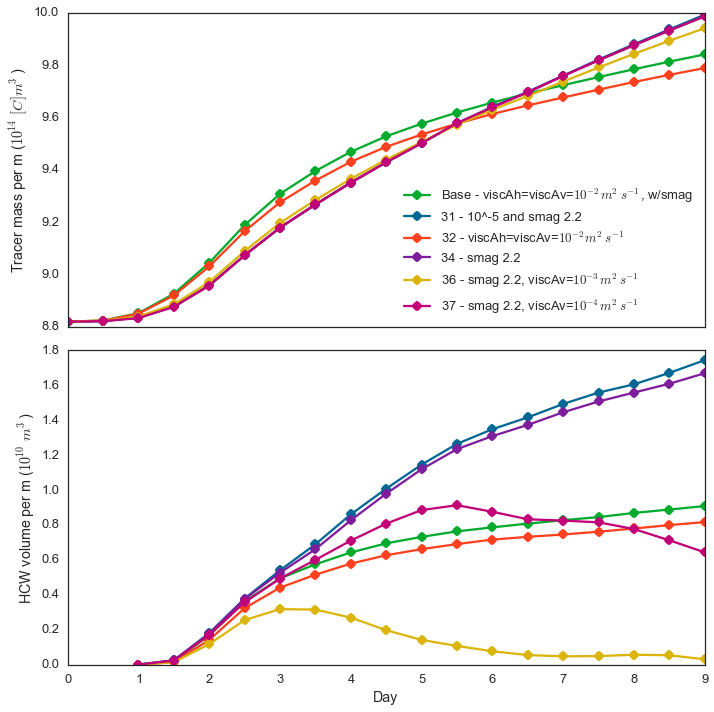

In [46]:
sns.set_context('talk')
sns.set_style('white')

fig,(ax1,ax2) = plt.subplots(2,1, figsize = (10,10),sharex=True)

tt = np.arange(19)

ax1.plot(tt/2.,np.sum(TrMASS03,axis=1)/1.E14,sns.xkcd_rgb["kelly green"],
         marker = 'o',label='Base - viscAh=viscAv=$10^{-2}m^2s^{-1}$, w/smag')
ax1.plot(tt/2.,np.sum(TrMASS31,axis=1)/1.E14,sns.xkcd_rgb["peacock blue"],
         marker = 'o',label='31 - 10^-5 and smag 2.2')
ax1.plot(tt/2.,np.sum(TrMASS32,axis=1)/1.E14,sns.xkcd_rgb["orange red"],
         marker = 'o',label = '32 - viscAh=viscAv=$10^{-2}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMASS34,axis=1)/1.E14,sns.xkcd_rgb["purple"],
         marker = 'o',label='34 - smag 2.2')
ax1.plot(tt/2.,np.sum(TrMASS36,axis=1)/1.E14,sns.xkcd_rgb["gold"],
         marker = 'o',label='36 - smag 2.2, viscAv=$10^{-3}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMASS37,axis=1)/1.E14,sns.xkcd_rgb["magenta"],
         marker = 'o',label='37 - smag 2.2, viscAv=$10^{-4}m^2s^{-1}$')

   
ax2.plot(tt/2.,np.sum(HCW03,axis=1)/1.E10,sns.xkcd_rgb["kelly green"],marker = 'o',label='Base')
ax2.plot(tt/2.,np.sum(HCW31,axis=1)/1.E10,sns.xkcd_rgb["peacock blue"],marker = 'o',label='31')
ax2.plot(tt/2.,np.sum(HCW32,axis=1)/1.E10,sns.xkcd_rgb["orange red"],marker = 'o',label='32')
ax2.plot(tt/2.,np.sum(HCW34,axis=1)/1.E10,sns.xkcd_rgb["purple"],marker = 'o',label='34')
ax2.plot(tt/2.,np.sum(HCW36,axis=1)/1.E10,sns.xkcd_rgb["gold"],marker = 'o',label='36')
ax2.plot(tt/2.,np.sum(HCW37,axis=1)/1.E10,sns.xkcd_rgb["magenta"],marker = 'o',label='37')
 
    
ax1.legend(loc=0)
ax2.set_xlabel('Day')
ax1.set_ylabel('Tracer mass per m ($10^{14}$ $[C]m^3$)')
ax2.set_ylabel('HCW volume per m ($10^{10}$ $m^3$)')
plt.tight_layout()

plt.show()